In [12]:
import pandas as pd
import sqlite3



In [13]:
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [14]:
con = sqlite3.connect("socioeconomic.db")
cur = con.cursor()

In [15]:
%sql sqlite:///socioeconomic.db

In [ ]:
df = pd.read_csv('https://data.cityofchicago.org/resource/jcxq-k9xf.csv')
df.to_sql("chicago_socioeconomic_data", con, if_exists='replace', index=False,method="multi")

In [20]:
%sql PRAGMA table_info([chicago_socioeconomic_data])

 * sqlite:///socioeconomic.db
Done.


cid,name,type,notnull,dflt_value,pk
0,ca,REAL,0,None,0
1,community_area_name,TEXT,0,None,0
2,percent_of_housing_crowded,REAL,0,None,0
3,percent_households_below_poverty,REAL,0,None,0
4,percent_aged_16_unemployed,REAL,0,None,0
5,percent_aged_25_without_high_school_diploma,REAL,0,None,0
6,percent_aged_under_18_or_over_64,REAL,0,None,0
7,per_capita_income_,INTEGER,0,None,0
8,hardship_index,REAL,0,None,0


In [19]:
%sql SELECT * FROM chicago_socioeconomic_data limit 5;

 * sqlite:///socioeconomic.db
Done.


ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [18]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
78


In [11]:
%sql SELECT COUNT(*) FROM chicago_socioeconomic_data WHERE hardship_index >50

 * sqlite:///socioeconomic.db
Done.


COUNT(*)
38


In [12]:
%sql SELECT MAX(hardship_index) FROM chicago_socioeconomic_data; 

 * sqlite:///socioeconomic.db
Done.


MAX(hardship_index)
98.0


In [15]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE hardship_index = ( select max(hardship_index) from chicago_socioeconomic_data ) ; 

 * sqlite:///socioeconomic.db
Done.


community_area_name
Riverdale


In [16]:
%sql SELECT community_area_name FROM chicago_socioeconomic_data WHERE  per_capita_income_	> 60000; 

 * sqlite:///socioeconomic.db
Done.


community_area_name
Lake View
Lincoln Park
Near North Side
Loop


 * sqlite:///socioeconomic.db
Done.


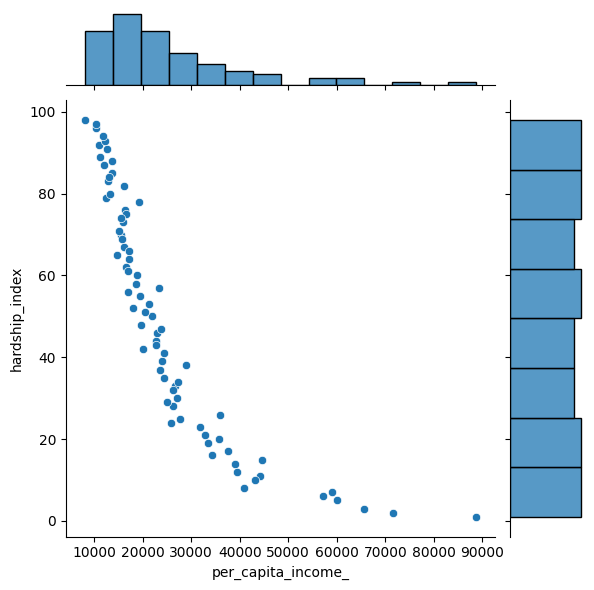

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

income_vs_hardship = %sql SELECT per_capita_income_, hardship_index FROM chicago_socioeconomic_data;
plot = sns.jointplot(x='per_capita_income_',y='hardship_index', data=income_vs_hardship.DataFrame())

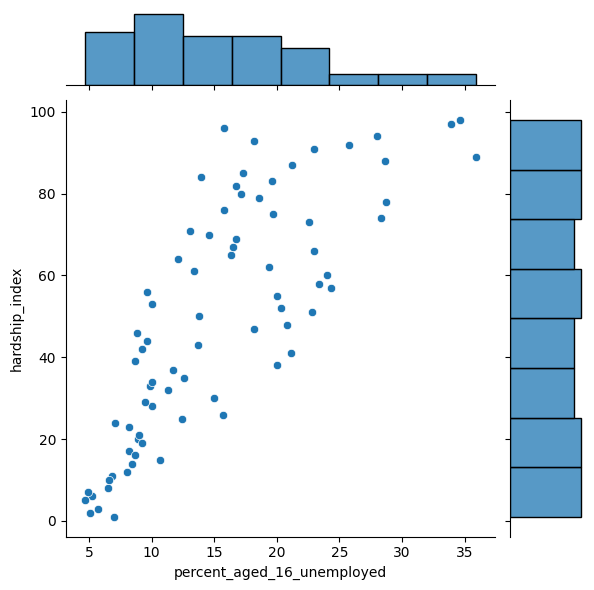

In [22]:
import seaborn as sns
plot = sns.jointplot(x='percent_aged_16_unemployed',y='hardship_index', data=df)
plot

In [8]:
len(df)

78